<a href="https://colab.research.google.com/github/varunjakanur/BC/blob/main/Traffic_Sign_Review_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/content/archive.zip')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/

 5_6120849758585096056.docx
 archive.zip
'ashu  Kannada pdf 1.pdf'
'Automated Traffic Sign Recognition.pptx'
'BCom I Sem English Text book (1).pdf'
'BCom I Sem English Text book.pdf'
 cartoonGAN
 Classroom
'Colab Notebooks'
 MeshDeformNet
 mini
'Multicore vs Multiprocessor. Which gives better performance according to you?.gsheet'
'New Doc 03-27-2023 18.38-1.pdf'
'New Doc 03-27-2023 18.38.pdf'
'New Doc 03-27-2023 18.44.pdf'
'New Doc 03-28-2023 18.43.pdf'
'PDFGallery_20230328_171424 (1).pdf'
'PDFGallery_20230328_171424 (2).pdf'
 PDFGallery_20230328_171424.pdf
'Varun Shankar Jakanur_Kle Tech University.pdf'
 Yoti
 ಮೊದಲನೆಯ_ಸೆಮಿಸ್ಟರ್_ನ_ಎಲ್ಲ_ನೋಟ್ಸ್.docx


In [ ]:
!unzip archive

unzip:  cannot find or open archive, archive.zip or archive.ZIP.


In [ ]:
!unzip MyDrive/archive.zip

unzip:  cannot find or open MyDrive/archive.zip, MyDrive/archive.zip.zip or MyDrive/archive.zip.ZIP.


### Store Data, Labels in the List

In [ ]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
cur_path

'F:\\5th Sem\\Mini-Project\\Traffic'

## Preprocess the Images

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting Lists into numpy arrays

In [ ]:
data = np.array(data)
labels = np.array(labels)

### Save Labels & Data for future use

In [ ]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

### Load data & labels

In [ ]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')



In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#                   Building the model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#categorical_crossentropy is an intution of ONE-HOT-ENCODING

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 92s 93ms/step - loss: 2.0714 - accuracy: 0.4715 - val_loss: 0.6573 - val_accuracy: 0.8497
Epoch 2/20
981/981 [==============================] - 91s 93ms/step - loss: 0.8074 - accuracy: 0.7584 - val_loss: 0.3004 - val_accuracy: 0.9166
Epoch 3/20
981/981 [==============================] - 88s 89ms/step - loss: 0.5599 - accuracy: 0.8338 - val_loss: 0.1791 - val_accuracy: 0.9496
Epoch 4/20
981/981 [==============================] - 91s 93ms/step - loss: 0.4336 - accuracy: 0.8706 - val_loss: 0.1408 - val_accuracy: 0.9593
Epoch 5/20
981/981 [==============================] - 94s 96ms/step - loss: 0.3657 - accuracy: 0.8902 - val_loss: 0.1172 - val_accuracy: 0.9668
Epoch 6/20
981/981 [==============================] - 91s 93ms/step - loss: 0.3239 - accuracy: 0.9049 - val_loss: 0.1038 - val_accuracy: 0.9722
Epoch 7/20
981/981 [==============================] - 92s 94ms/step - loss: 0.3036 - accuracy: 0.9108 - val_loss: 0.1349 - val_accuracy:

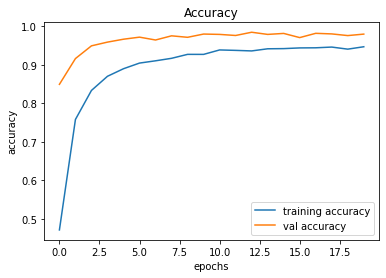

In [ ]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

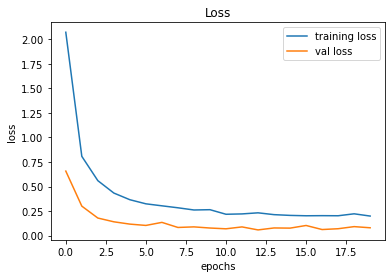

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Let's do testing on the Test data

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

395/395 [==============================] - 5s 13ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

### Accuracy in handling the test data

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.944972288202692


### Save the model

In [ ]:
model.save("./training/TSR.h5")

### Load the Model

In [ ]:
import os
os.chdir(r'F:/5th Sem/Mini-Project/Traffic')
from keras.models import load_model
model = load_model('./training/TSR.h5')

## Defining the different classes

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    return image,Y_pred

1/1 [==============================] - 0s 305ms/step
Predicted traffic sign is:  Speed limit (30km/h)


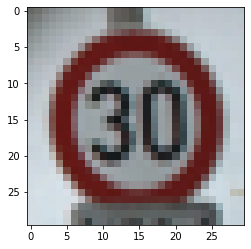

In [ ]:
plot,prediction = test_on_img(r'F:/5th Sem/Mini-Project/Traffic/Test/00284.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 28ms/step
Predicted traffic sign is:  Turn right ahead


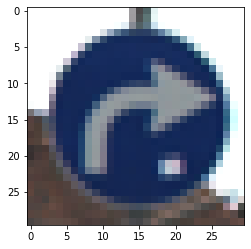

In [ ]:
plot,prediction = test_on_img(r'F:/5th Sem/Mini-Project/Traffic/Test/00174.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 22ms/step
Predicted traffic sign is:  Speed limit (70km/h)


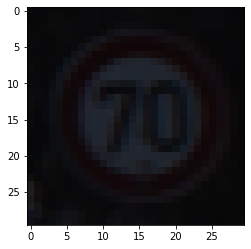

In [ ]:
plot,prediction = test_on_img(r'F:/5th Sem/Mini-Project/Traffic/Test/01017.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()